
# Hollow Glass Ring in Air

N1 in Bird

In [1]:
import numpy as np

from fiberamp.fiber.microstruct.bragg import BraggExact
from fiberamp.fiber.microstruct.bragg import plotlogf
from ngsolve.webgui import Draw
from ngsolve import CF
from scipy.optimize import newton
from scipy.linalg import null_space

In [2]:
n_air = 1.00027717
n_glass = 1.4388164768221814

ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_air]

ts = [4.0775e-05, 1e-5, 4.0775e-05]

mats = ['air', 'glass', 'air']

maxhs = [.1,.01, .1]

In [3]:
A = BraggExact(ts=ts, mats=mats, ns=ns, maxhs=maxhs, wl=3.25e-6)


Boundary names not provided, using default names.


In [32]:
Draw(A.mesh)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

BaseWebGuiScene

In [4]:
k_low = A.k0 * A.ns[0] * A.scale
k_low

96.69118181001811

In [5]:
outer = 'h2'
nu = 1

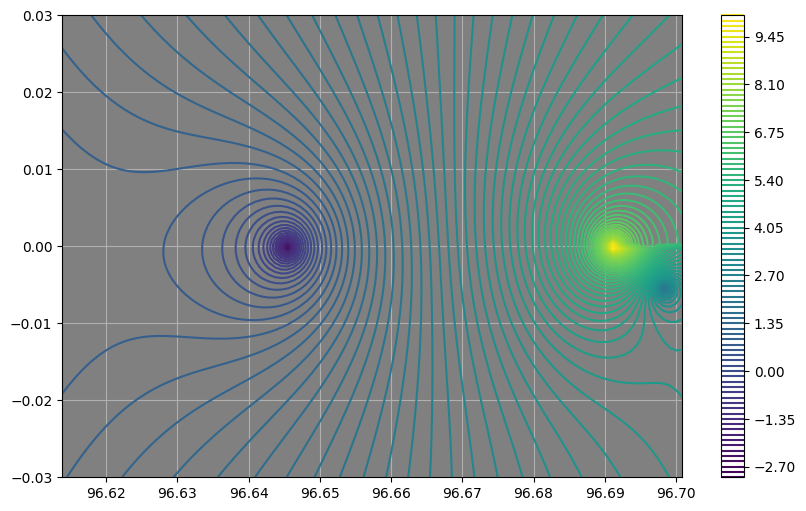

In [6]:
%matplotlib inline
plotlogf(A.determinant, .9992*k_low, 1.0001*k_low, -.03,.03, nu, outer,
         iref=100, rref=100, levels=100, figsize=(10,6))

In [7]:
guess = np.array(.9999 * k_low)

beta1 = newton(A.determinant, guess, args=(nu, outer), tol = 1e-15)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer)))


Scaled beta:  (96.64544683331876-0.00010556540927729814j) . Residual of determinant:  1.4379715762382519e-12


# Bragg Exact Fields

In [8]:
FsA = A.all_fields(beta1, nu, outer)

### Electric

In [10]:
Draw(FsA['Ez'], A.mesh)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

BaseWebGuiScene

In [ ]:
# Draw(FsA['Etv'].real, A.mesh, vectors={'grid_size':300}) # this takes a bit

In [11]:
Draw(1/45.5616025654*FsA['Etv'].Norm(), A.mesh, min=-.2, max=1)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

BaseWebGuiScene

In [ ]:
Draw(FsA['Ex'].imag, A.mesh)

In [ ]:
Draw(FsA['Ephi'].imag, A.mesh)

# 1D cross sections

In [12]:
fsA = A.fields_matplot(beta1, nu, outer)

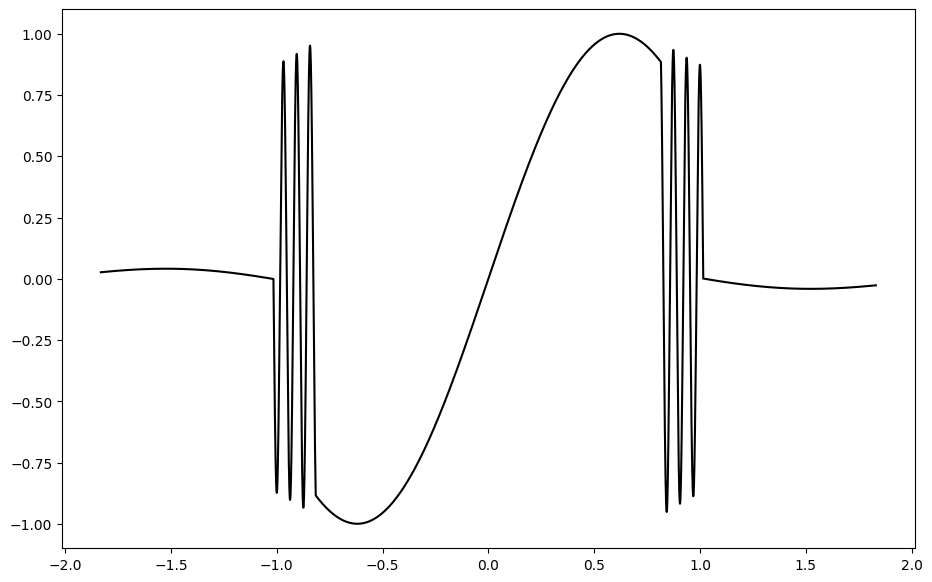

Text(0.5, 71.44444444444443, '\nDistance from Fiber Center')

In [13]:
%matplotlib inline
fig, ax = A.plot1D(fsA['Ez_rad'], double_r=True, rlist=[400,1000,400], nu=nu, maxscale=True,
                  linewidth=1.5, color='k', figsize=(11,7))
Rhos = A.rhos/A.scale

ax.arrow(0,0, Rhos[-1], 0, color='lightgray', width=.001, 
         head_width=.03, head_length=.1)
ax.arrow(0,0, -Rhos[-1], 0, color='lightgray', width=.001, 
         head_width=.03, head_length=.1)
# ax.set_ylim(-.2,1.2)

ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
m, M = ax.get_ylim()
# for r in Rhos:
#     ax.plot([r,r], [m, M], 'gray', linewidth=1.2, linestyle=':')
#     ax.plot([-r,-r], [m, M], 'gray', linewidth=1.2, linestyle=':')
ax.set_xlabel('\nDistance from Fiber Center')
# fig.savefig('/home/pv/papers/outer_materials/slides/figures/images/jpgs/bragg_N1_1Dlong.jpg')
# fig.savefig('/home/pv/papers/outer_materials/manuscript/submission/1dlong.pdf')

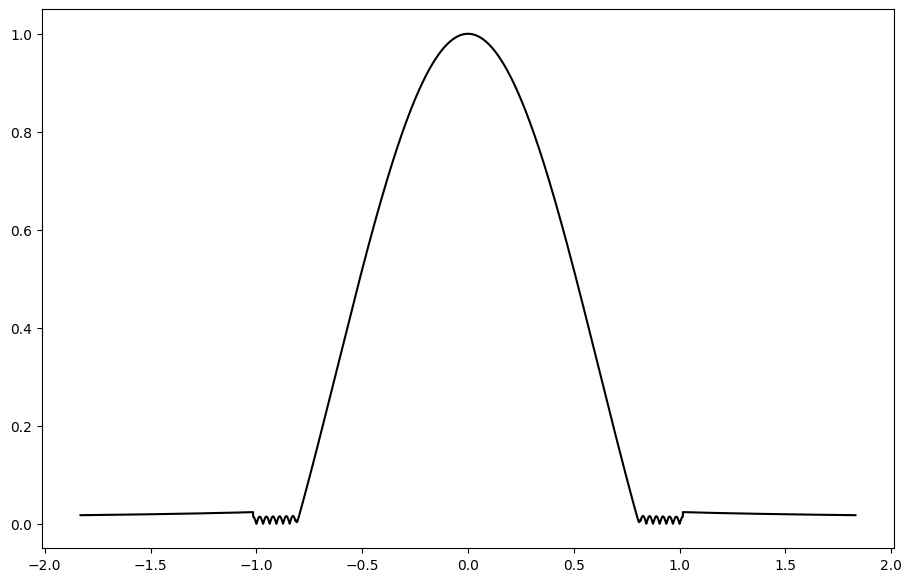

Text(0.5, 71.44444444444443, '\nDistance from Fiber Center')

In [14]:
%matplotlib inline

Etv_rad_norm = lambda x : (np.abs(fsA['Ex'](x,0))**2 + np.abs(fsA['Ey'](x,0))**2)**.5

fig, ax = A.plot1D(Etv_rad_norm, double_r=True, part='norm', rlist=[400,1000,400], nu=nu, maxscale=True,
                  linewidth=1.5, color='k',  figsize=(11,7))
Rhos = A.rhos/A.scale

ax.arrow(0,0, Rhos[-1], 0, color='lightgray', width=.001, 
         head_width=.015, head_length=.1)
ax.arrow(0,0, -Rhos[-1], 0, color='lightgray', width=.001, 
         head_width=.015, head_length=.1)

ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
m, M = ax.get_ylim()
# for r in Rhos:
#     ax.plot([r,r], [m, M], 'gray', linewidth=.8, linestyle=':')
#     ax.plot([-r,-r], [m, M], 'gray', linewidth=.8, linestyle=':')
ax.set_xlabel('\nDistance from Fiber Center')
# fig.savefig('/home/pv/papers/outer_materials/slides/figures/images/jpgs/bragg_N1_1Dtransverse.jpg')
# fig.savefig('/home/pv/papers/outer_materials/manuscript/submission/1dtransverse.pdf')

### Magnetic

In [ ]:
Draw(1e1*FsA['Hz'], A.mesh)

In [ ]:
Draw(FsA['Hphi'].imag, A.mesh)

### Poynting Vector

In [ ]:
Draw(FsA['Sz'], A.mesh)  # also takes a bit to plot

In [ ]:
Draw(FsA['Sr'], A.mesh)  # also takes a bit to plot

# Resonant mode

In [15]:
# Formula for loss spikes from article

ms = np.arange(11,15,1)

n1 = A.ns[0]  # Inner (core) index
n2 = A.ns[1]  # Cladding index

d = 15*2/3*1e-6

ls = (2 * n1 * d / ms * ((n2/n1)**2 - 1)**.5)  # when n2 depends on ls, need solver
ls

array([1.88042411e-06, 1.72372210e-06, 1.59112809e-06, 1.47747609e-06])

In [16]:
wl_res= 1.592e-06

In [17]:
n_air = 1.00027717
n_glass = 1.4388164768221814

ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_air]

ts = [4.0775e-05, 1e-5, 4.0775e-05]

mats = ['air', 'glass', 'air']

maxhs = [.1,.015, .1]

In [18]:
B = BraggExact(ts=ts, mats=mats, ns=ns, maxhs=maxhs, wl=wl_res)



Boundary names not provided, using default names.


In [19]:
k_low = B.k0 * B.ns[0] * B.scale
k_low

197.3909176397983

In [20]:
outer = 'h2'
nu = 1

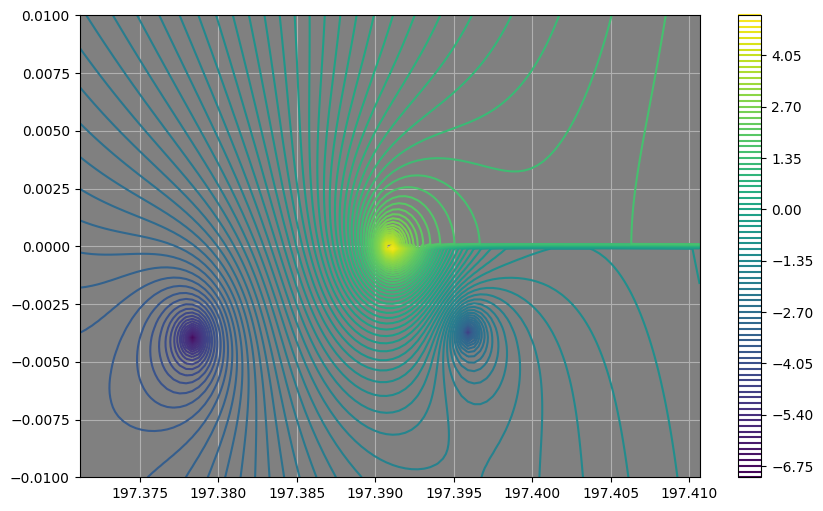

In [21]:
%matplotlib inline
plotlogf(B.determinant, .9999*k_low, 1.0001*k_low, -.01,.01, nu, outer,
         iref=100, rref=100, levels=100, figsize=(10,6))

In [22]:
guess = np.array(.99992 * k_low)

beta1 = newton(B.determinant, guess, args=(nu, outer), tol = 1e-15)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(B.determinant(beta1, nu, outer)))


Scaled beta:  (197.37843043624082-0.003972168242267891j) . Residual of determinant:  2.568513440099934e-13


# Bragg Exact Fields

In [23]:
FsB = B.all_fields(beta1, nu, outer)

### Electric

In [24]:
Draw(FsB['Ez'], B.mesh)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

BaseWebGuiScene

In [33]:
Draw(FsB['Etv'].real, B.mesh)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

BaseWebGuiScene

In [25]:
fsB = B.fields_matplot(beta1, nu, outer)

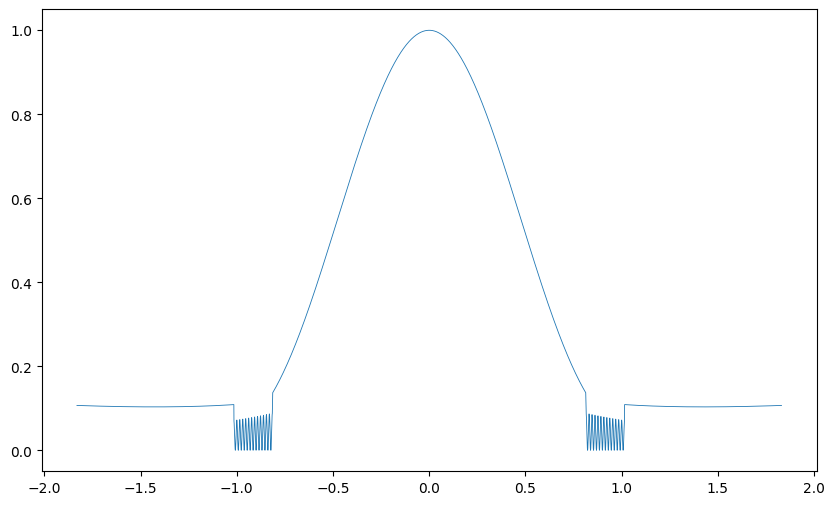

In [36]:
%matplotlib inline
figsize=(10,6)
fig, ax = B.plot1D(fsB['Sz_rad'], double_r=True, rlist=[400,1000,400], nu=nu, 
                   part='norm', maxscale=True, figsize=figsize, linewidth=.6,
                  label='Sz at spike')
B.add1D_plot(ax, fsA['Sz_rad'], double_r=True,  nu=nu, part='norm', maxscale=True, linewidth=.6,
            label='Sz at trough')
ax.legend();

<IPython.core.display.Javascript object>


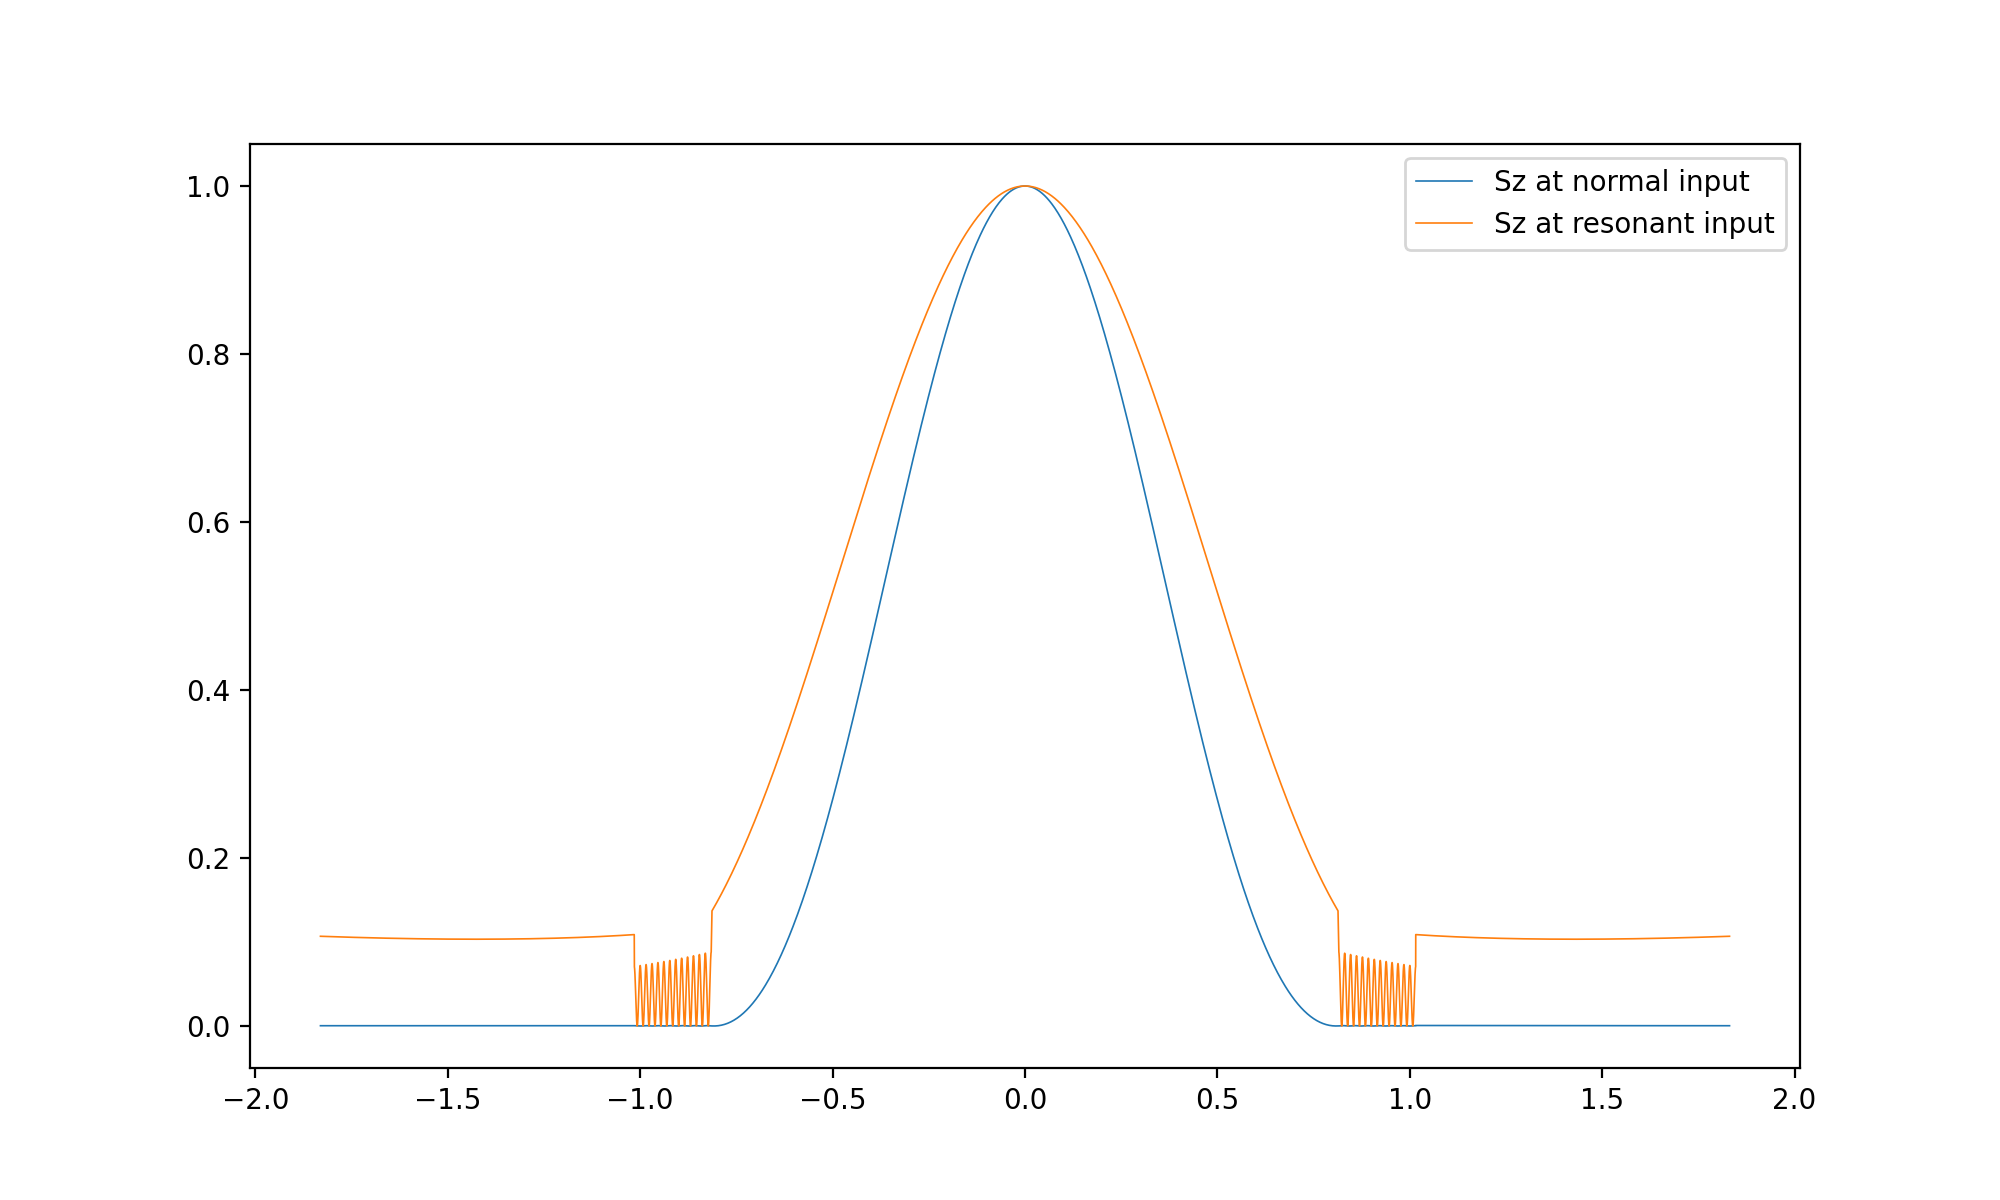

In [41]:
%matplotlib notebook
figsize=(10,6)
fig, ax = B.plot1D(fsA['Sz_rad'], double_r=True, rlist=[400,1000,400], nu=nu, 
                   part='norm', maxscale=True, figsize=figsize, linewidth=.6,
                  label='Sz at normal input')
B.add1D_plot(ax, fsB['Sz_rad'], double_r=True,  nu=nu, part='norm', maxscale=True, linewidth=.6,
            label='Sz at resonant input')
ax.legend();